In [1]:
import os

In [2]:
os.environ['OMP_NUM_THREADS'] = '1'

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
from sklearn.datasets import load_wine
wine_dataset = load_wine() #wine_dataset

In [7]:
wd = pd.DataFrame(wine_dataset.data, columns=wine_dataset.feature_names)
wd.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


Предметная область: виноделие

Источник данных: https://scikit-learn.org/stable/datasets/toy_dataset.html

Характер данных: реальные.

Эти данные являются результатами химического анализа вин, выращенных в одном и том же регионе Италии тремя разными культиваторами. Было проведено тринадцать различных измерений, проведенных для различных компонентов, содержащихся в трех типах вина.

Атрибуты: 13 числовых атрибутов

Целевая переменная: сорт вина

Пропущенные данные: отсутствуют

1. Alcohol - алкоголь
2. Malic acid - яблочная кислота
3. Ash - пепел
4. Alcalinity of ash - щелочность золы
5. Magnesium - магний
6. Total phenols - всего фенолов
7. Flavanoids - флаваноиды
8. Nonflavanoid phenols - нефлаваноидные фенолы
9. Proanthocyanins - проантоцианы
10. Color intensity - интенсивность цвета
11. Hue - оттенок
12. OD280/OD315 of diluted wines - OD280 / OD315 разбавленных вин
13. Proline - пролин

Добавим новый атрибут - среднее содержание алкоголя

In [8]:
wd['average_alcohol_content'] = wd[['alcohol']].mean(axis=1)

In [9]:
wd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  avera

Нахождение и удаление выбросов из датасета

In [10]:
outliers = []
for col in wd.columns:    
    q1=wd[col].quantile(0.25)    
    q3=wd[col].quantile(0.75)    
    IQR=q3-q1    
    index = list(wd[col][(wd[col]<(q1-1.5*IQR)) | (wd[col]>(q3+1.5*IQR))].index)
    for i in range(len(index)):
        if len(index) != 0 and index[i] not in outliers:
            outliers.append(index[i])
outliers.sort()
print(outliers)

[25, 59, 69, 73, 78, 95, 110, 115, 121, 123, 127, 137, 151, 158, 159, 166, 173]


In [11]:
wd = wd.drop(outliers)

Удаление выбросов из целевой переменной

In [12]:
target_df = pd.DataFrame({'target': wine_dataset.target})
target_df = target_df.drop(outliers)

In [13]:
wd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       161 non-null    float64
 1   malic_acid                    161 non-null    float64
 2   ash                           161 non-null    float64
 3   alcalinity_of_ash             161 non-null    float64
 4   magnesium                     161 non-null    float64
 5   total_phenols                 161 non-null    float64
 6   flavanoids                    161 non-null    float64
 7   nonflavanoid_phenols          161 non-null    float64
 8   proanthocyanins               161 non-null    float64
 9   color_intensity               161 non-null    float64
 10  hue                           161 non-null    float64
 11  od280/od315_of_diluted_wines  161 non-null    float64
 12  proline                       161 non-null    float64
 13  average_al

Графики зависимости переменных и поиск ярковыраженных групп

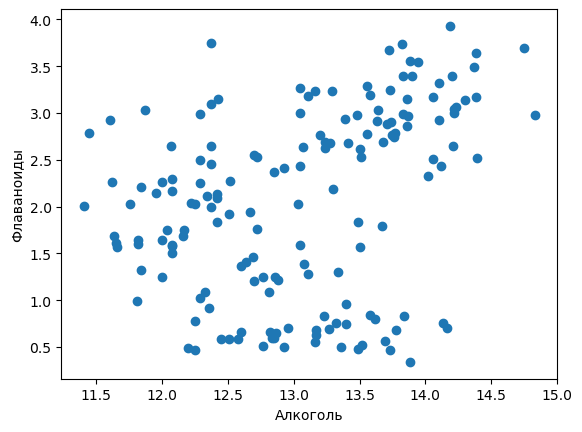

In [14]:
plt.scatter(x='alcohol', y='flavanoids', data=wd)
plt.xlabel('Алкоголь')
plt.ylabel('Флаваноиды')
plt.show()

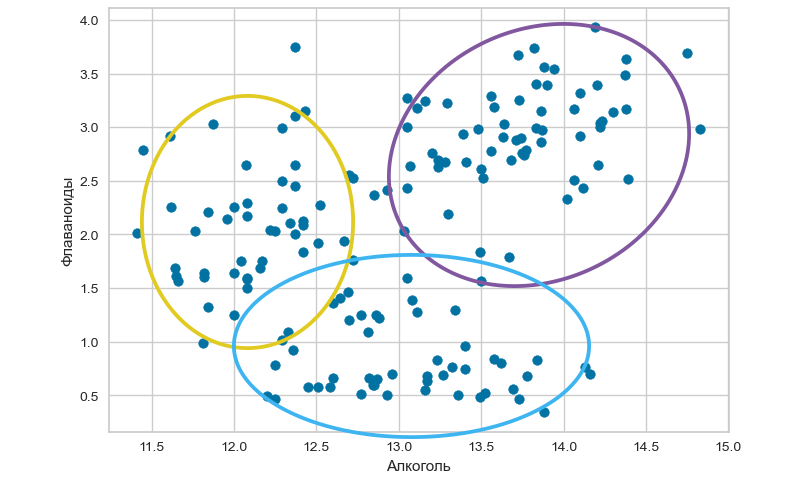

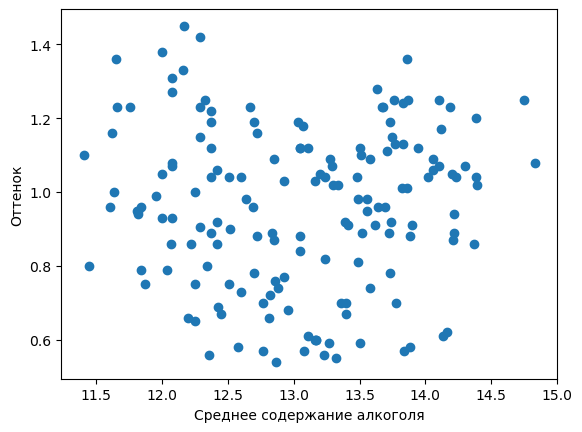

In [15]:
plt.scatter(x='average_alcohol_content', y='hue', data=wd)
plt.xlabel('Среднее содержание алкоголя')
plt.ylabel('Оттенок')
plt.show()

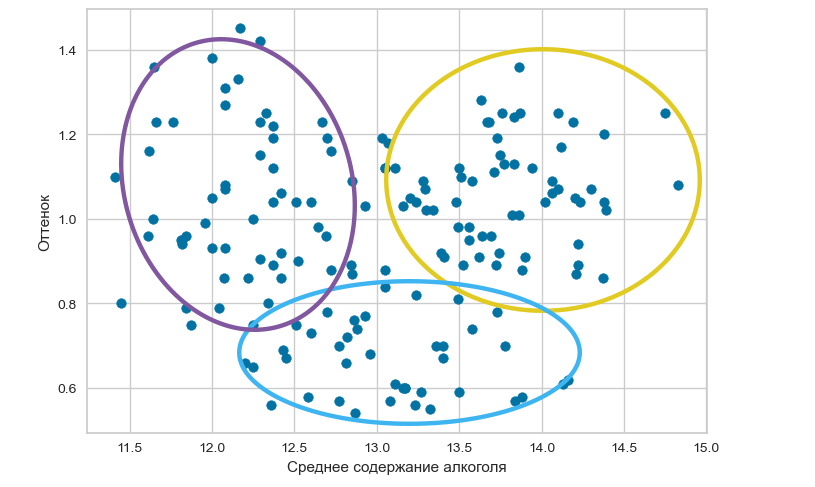

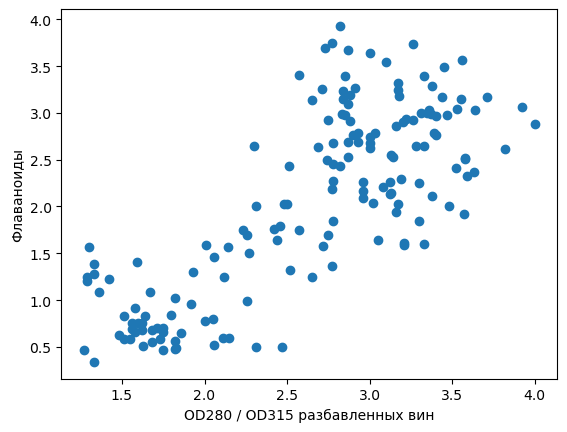

In [16]:
plt.scatter(x='od280/od315_of_diluted_wines', y='flavanoids', data=wd)
plt.xlabel('OD280 / OD315 разбавленных вин')
plt.ylabel('Флаваноиды')
plt.show()

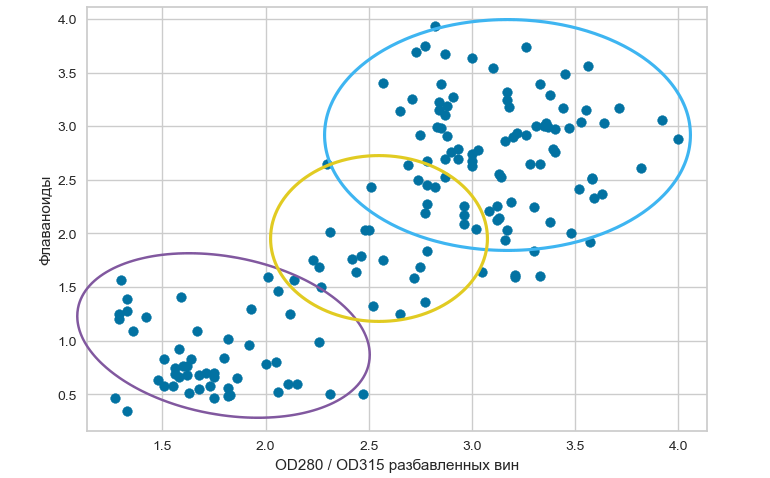

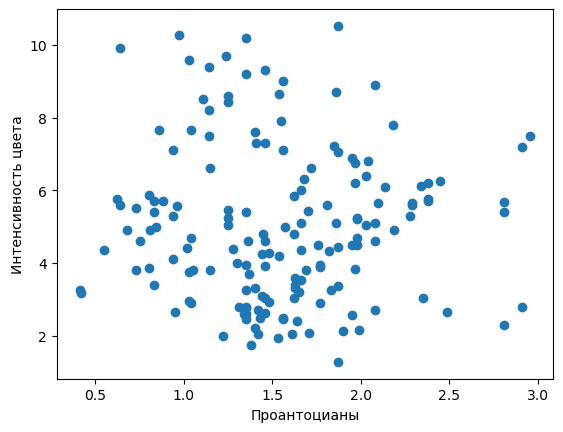

In [17]:
plt.scatter(x='proanthocyanins', y='color_intensity', data=wd)
plt.xlabel('Проантоцианы')
plt.ylabel('Интенсивность цвета')
plt.show()

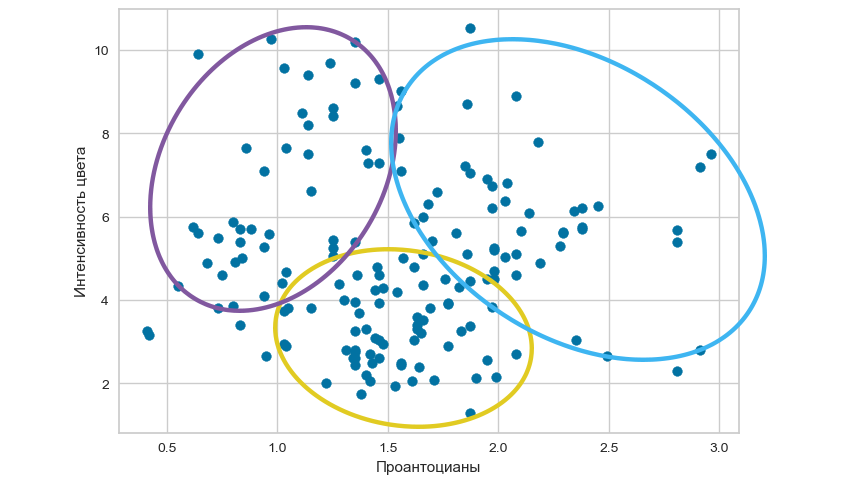

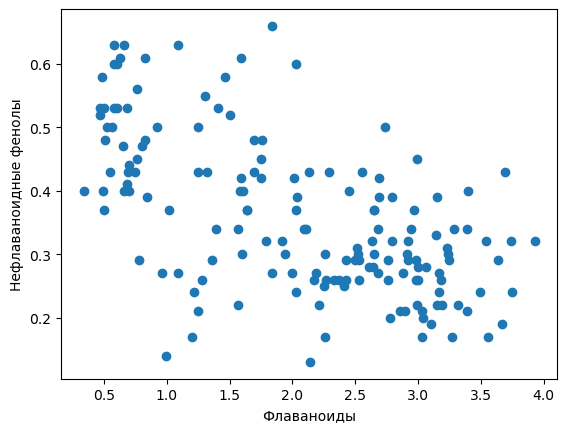

In [18]:
plt.scatter(x='flavanoids', y='nonflavanoid_phenols', data=wd)
plt.xlabel('Флаваноиды')
plt.ylabel('Нефлаваноидные фенолы')
plt.show()

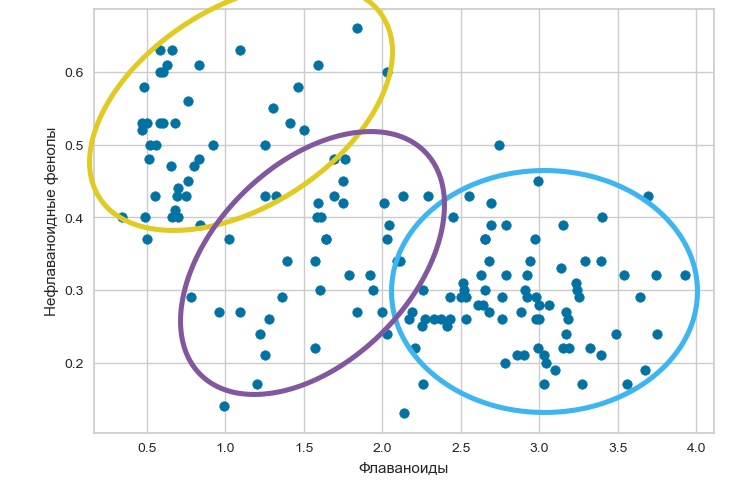

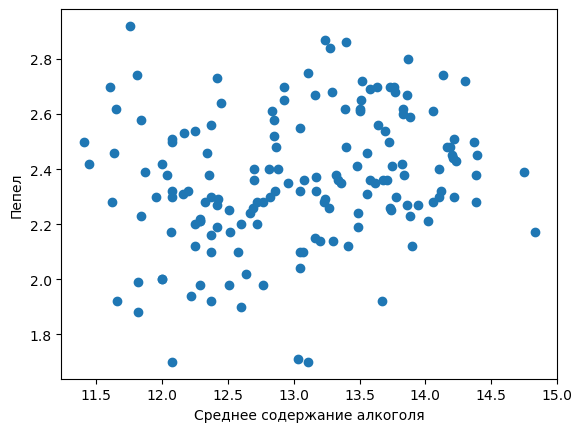

In [19]:
plt.scatter(x='average_alcohol_content', y='ash', data=wd)
plt.xlabel('Среднее содержание алкоголя')
plt.ylabel('Пепел')
plt.show()

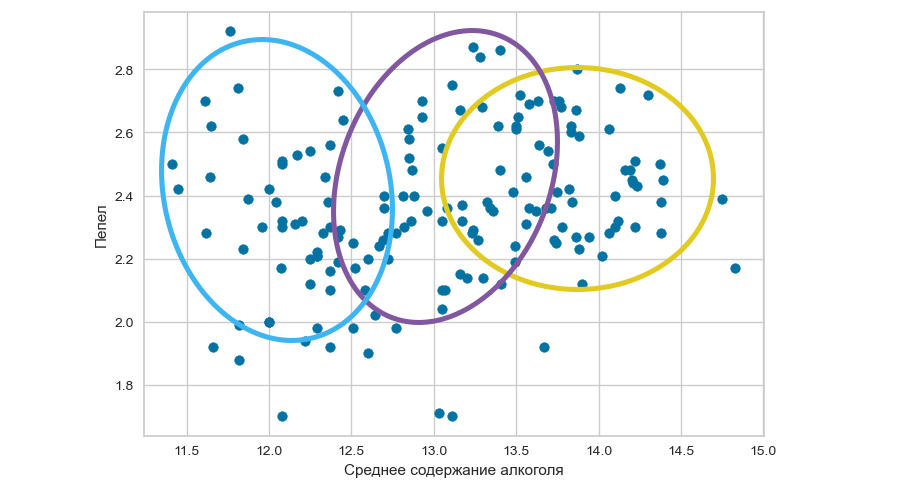

Подготовка данных для использования KMeans

In [20]:
wine_attr = wd # признаки
wine_target = target_df # целевая переменная

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler() # стандартизация
wine_attr_scaled = scaler.fit_transform(wine_attr)

In [23]:
from yellowbrick.cluster import KElbowVisualizer

In [24]:
from sklearn.cluster import KMeans

Выбор количества кластеров при помощи метода локтя

In [25]:
model = KMeans(n_init=10, random_state=0)

KElbowVisualizer(ax=<Axes: >,
                 estimator=KMeans(n_clusters=5, n_init=10, random_state=0),
                 k=(1, 6), timings=False)

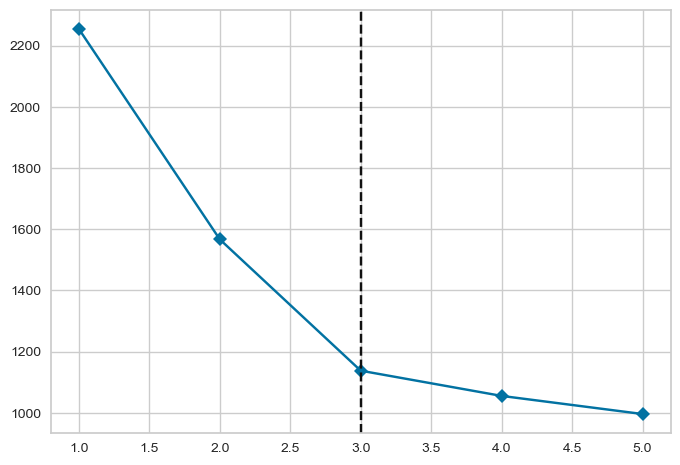

In [26]:
visualizer = KElbowVisualizer(model, k=(1, 6), timings=False)
visualizer.fit(wine_attr_scaled)

In [27]:
optimal_clusters = 3

Использование KMeans

In [28]:
kmeans = KMeans(n_init = 10, n_clusters=optimal_clusters, random_state=42)

In [29]:
kmeans.fit(wine_attr_scaled)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [30]:
cluster_labels = kmeans.labels_
wd['cluster'] = cluster_labels

Визуализация полученных кластеров

Text(0, 0.5, 'Флаваноиды')

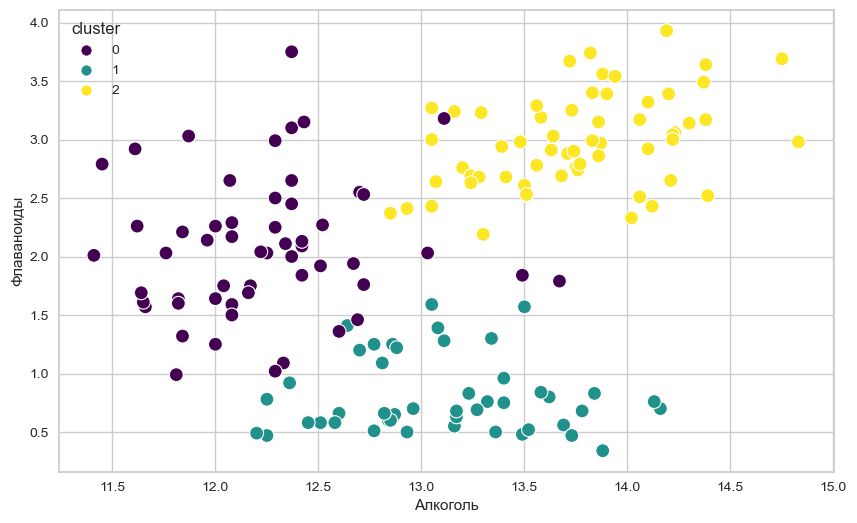

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='alcohol', y='flavanoids', hue='cluster', data=wd, palette='viridis', s=100)
plt.xlabel('Алкоголь')
plt.ylabel('Флаваноиды')

Text(0, 0.5, 'Оттенок')

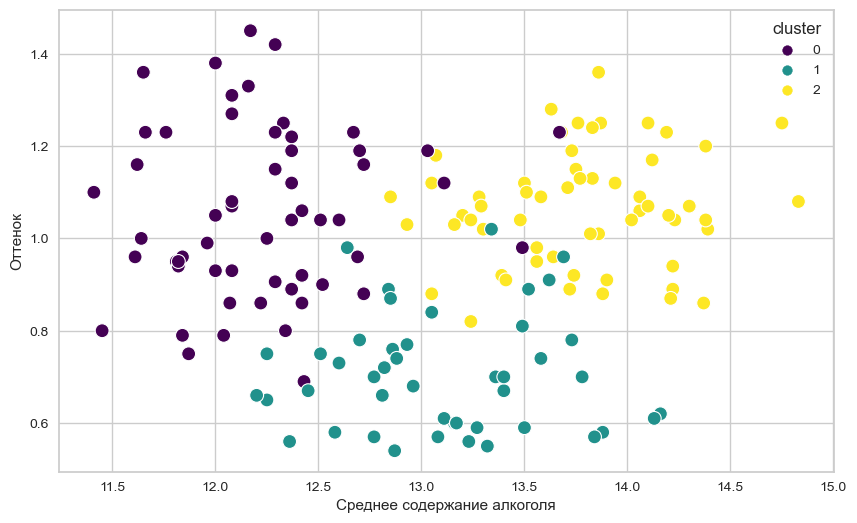

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_alcohol_content', y='hue', hue='cluster', data=wd, palette='viridis', s=100)
plt.xlabel('Среднее содержание алкоголя')
plt.ylabel('Оттенок')

Text(0, 0.5, 'Флаваноиды')

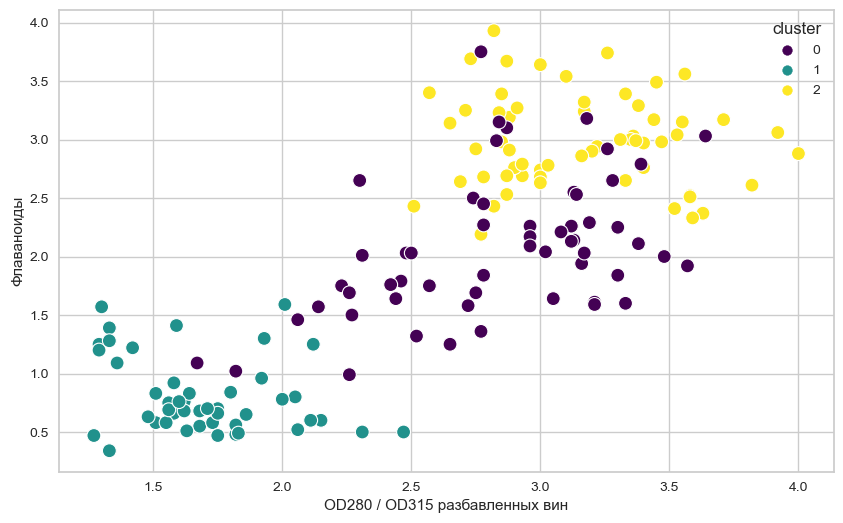

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='od280/od315_of_diluted_wines', y='flavanoids', hue='cluster', data=wd, palette='viridis', s=100)
plt.xlabel('OD280 / OD315 разбавленных вин')
plt.ylabel('Флаваноиды')

Text(0, 0.5, 'Интенсивность цвета')

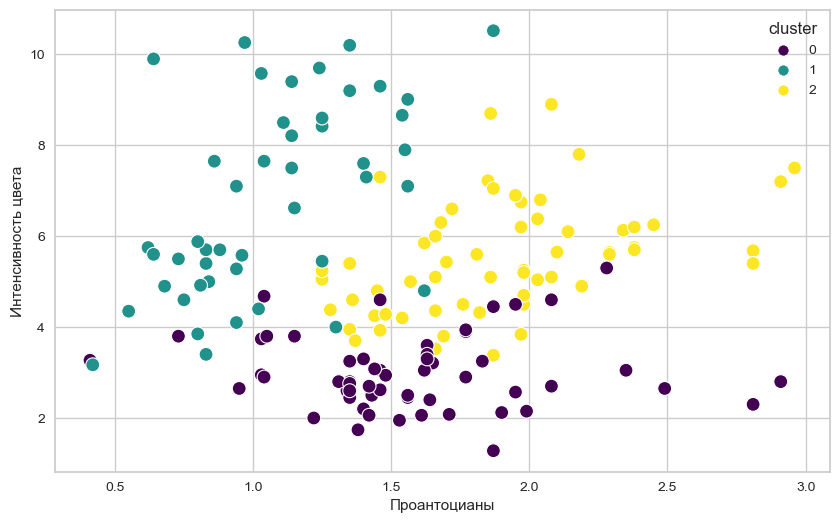

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='proanthocyanins', y='color_intensity', hue='cluster', data=wd, palette='viridis', s=100)
plt.xlabel('Проантоцианы')
plt.ylabel('Интенсивность цвета')

Text(0, 0.5, 'Нефлаваноидные фенолы')

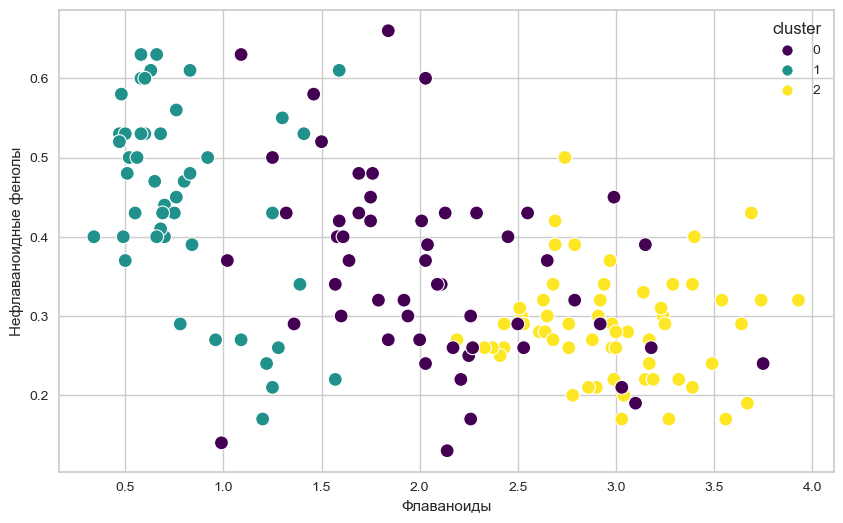

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='flavanoids', y='nonflavanoid_phenols', hue='cluster', data=wd, palette='viridis', s=100)
plt.xlabel('Флаваноиды')
plt.ylabel('Нефлаваноидные фенолы')

Text(0, 0.5, 'Пепел')

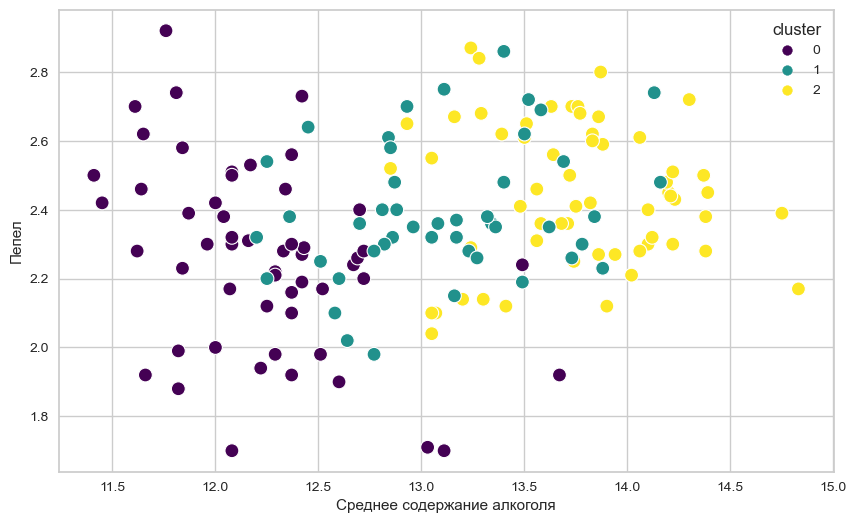

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_alcohol_content', y='ash', hue='cluster', data=wd, palette='viridis', s=100)
plt.xlabel('Среднее содержание алкоголя')
plt.ylabel('Пепел')